In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#data = pd.read_csv("/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv")
#from google.colab import drive
#from google.colab import files
#drive.mount('/content/drive/')
#data = pd.read_csv("/content/drive/MyDrive/DisinfoDeception/labeled_data.csv")

data = pd.read_csv("/work/input.csv")

df = pd.DataFrame(data) 

df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [4]:
class_tweet = df[['class', 'tweet']]
class_tweet.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
from sklearn.model_selection import train_test_split  

x_tweet = df[['tweet']]
y_class = df[['class']]

x_tweet_train, x_tweet_test, y_class_train, y_class_test = train_test_split(x_tweet, y_class, test_size=0.25, random_state=0)

#bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3") 
#bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [6]:
x_tweet_train

,tweet
6455,@kieffer_jason i swear u a fuck nigga u a scar...
13493,Now this new bitch acting dumb tryna correct m...
8003,Bet Charlie Strong has contacted Ridley
24732,yal some faggots yup nigga you n you fuckin fr...
18088,RT @WorIdStarFunnyy: When you and your boys di...
...,...
13123,"My partna from Mississippi told me 2weeks ago,..."
19648,RT @mckayllaa: I wish I had pretty colored eyes .
9845,"Hoes all on my bandwagon, your bitch gaggin, s..."
10799,I never played a bitch... But bitches most def...


In [7]:
x_tweet_test

,tweet
4129,@Misplaced_Momma \nHello dare momma. I show gl...
15081,RT @DymondMarie1: Shoutout to your main bitch !
16547,RT @MsKeeKee90s: Throw it up! Like a pizza! Ge...
4273,@Nien_Nunb what did you search? Gay redneck ep...
4254,@Ncoleycole u still a mutt tho lol
...,...
17416,RT @SteeloBrim: Captain Kirk hoe!
719,#HolySpirit Joshua 1:3 Every place that the so...
20518,"Reminiscin on my swinger days, when I drove a ..."
3152,@FOLLOWNOVA Yooo I was thinking bout that the ...


In [8]:
y_class_train

,class
6455,1
13493,1
8003,2
24732,1
18088,1
...,...
13123,1
19648,2
9845,1
10799,1


In [9]:
y_class_test

,class
4129,2
15081,1
16547,1
4273,0
4254,2
...,...
17416,1
719,2
20518,1
3152,1


In [10]:
x_tweet_train.shape

(18587, 1)

In [11]:
x_tweet_test.shape

(6196, 1)

In [12]:
##no
#x_tweet_test_copy = x_tweet_test.copy()
#x_tweet_test_copy.reset_index(inplace = True)
#x_tweet_test_copy.shape

In [13]:
##no
#x_tweet_train_copy = x_tweet_train.copy()
#x_tweet_train_copy.reset_index(inplace = True)
#x_tweet_train_copy.shape

In [14]:
x_tweet_train = x_tweet_train.squeeze()
type(x_tweet_train.squeeze())

pandas.core.series.Series

In [15]:
x_tweet_test = x_tweet_test.squeeze()
type(x_tweet_test)

pandas.core.series.Series

In [16]:
x_tweet_test.shape

(6196,)

In [17]:
x_tweet_train.shape

(18587,)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_tweet_train)
tfidf_test = tfidf_vectorizer.transform(x_tweet_test)
tfidf_test.shape

(6196, 29743)

In [19]:
tfidf_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
#lists all the unique words it vectorized
#tfidf_vectorizer.vocabulary_

In [21]:
y_class_test = y_class_test.squeeze()
type(y_class_test)

pandas.core.series.Series

In [22]:
y_class_train = y_class_train.squeeze()
type(y_class_train)

pandas.core.series.Series

In [23]:
#import pretrained model, import accuracy finder package (accuracy_score)
from sklearn.metrics import accuracy_score
#this pretrained model uses linear, while other was naive bayes
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
#random forest

#instantiate instance of own pretrained model
pac = PassiveAggressiveClassifier(max_iter=50)

#trains her pretrained model adapted to her own dataset using transfer learning
pac.fit(tfidf_train, y_class_train)

y_pred = pac.predict(tfidf_test) #Test or something
score = accuracy_score(y_class_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.06%


In [24]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

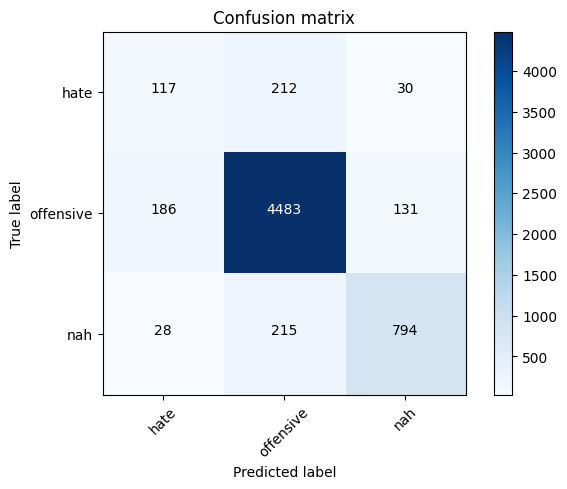

In [25]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_class_test, y_pred)
plot_confusion_matrix(CM, classes=['hate', 'offensive', 'nah']) #wow

In [26]:
#2nd pretrained model
from sklearn.naive_bayes import MultinomialNB

#hyperparameter alpha value specific to naive bayes algorithm
mnb = MultinomialNB(alpha = 0.1)
mnb.fit(tfidf_train, y_class_train)
mnb_prediction = mnb.predict(tfidf_test)
score_mnb = accuracy_score(y_class_test,y_pred)
print(score_mnb)

0.8705616526791479


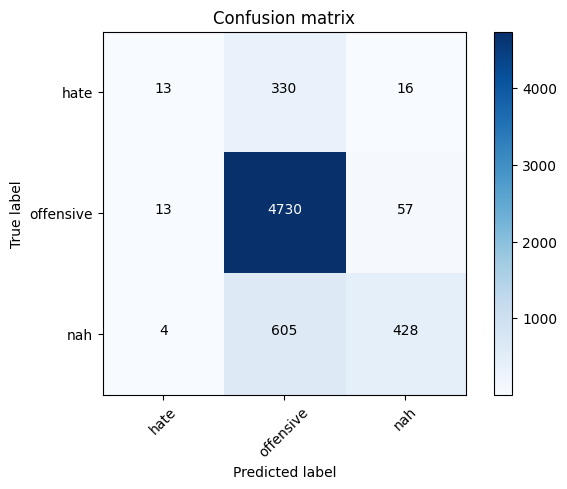

In [27]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_class_test, mnb_prediction)
plot_confusion_matrix(CM, classes=['hate', 'offensive', 'nah'])

In [28]:
test_input = ['you suck']
tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction1 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction1)

if test_prediction1[0] == 0:
    print("pac: hate")
elif test_prediction1[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    

test2_prediction1 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction1)

if test2_prediction1[0] == 0:
    print("mnb: hate")
elif test2_prediction1[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [0]
pac: hate
mnb:  [1]
mnb: offensive


In [29]:
test_input = ['you big idiot know nothing useful u asshole']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction2 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction2)

if test_prediction2[0] == 0:
    print("pac: hate")
elif test_prediction2[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction2 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction2)

if test2_prediction2[0] == 0:
    print("mnb: hate")
elif test2_prediction2[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [1]
pac: offensive
mnb:  [1]
mnb: offensive


In [30]:
test_input = ['you']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction3 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction3)

if test_prediction3[0] == 0:
    print("pac: hate")
elif test_prediction3[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction3 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction3)

if test2_prediction3[0] == 0:
    print("mnb: hate")
elif test2_prediction3[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [1]
pac: offensive
mnb:  [1]
mnb: offensive


In [31]:
test_input = ['you are nice']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction4 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction4)

if test_prediction4[0] == 0:
    print("pac: hate")
elif test_prediction4[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
test2_prediction4 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction4)

if test2_prediction4[0] == 0:
    print("mnb: hate")
elif test2_prediction4[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [2]
pac: nah
mnb:  [1]
mnb: offensive


In [32]:
test_input = ["hi bitch"]


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction5 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction5)

if test_prediction5[0] == 0:
    print("pac: hate")
elif test_prediction5[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction5 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction5)

if test2_prediction5[0] == 0:
    print("mnb: hate")
elif test2_prediction5[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [1]
pac: offensive
mnb:  [1]
mnb: offensive


In [33]:
test_input = ['you have an ugly face']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction6 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction6)

if test_prediction6[0] == 0:
    print("pac: hate")
elif test_prediction6[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction6 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction6)

if test2_prediction6[0] == 0:
    print("mnb: hate")
elif test2_prediction6[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [0]
pac: hate
mnb:  [1]
mnb: offensive


In [34]:
##past attempts
#from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier()
#clf.fit(x_tweet_train, y_class_train)
#Accuracy = clf.score(x_tweet_test, y_class_test)
#print(Accuracy*100)

# Attacks

## attack by library

In [35]:
!pip install -U nltk

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [36]:
#from textattack.augmentation import EasyDataAugmenter

ModuleNotFoundError: No module named 'textattack'

In [0]:
##no
#from textattack.models.wrappers import SklearnModelWrapper
#model_wrapper = SklearnModelWrapper(pac, y_class_test)

#from textattack.datasets import HuggingFaceDataset
##from textattack.attack_recipes import TextFoolerJin2019
#from textattack import Attacker

#augmenter = EasyDataAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)

#x_tweet_test
#attack = augmenter.augment(model_wrapper)

#attacker = Attacker(attack, x_tweet_test)
#attacker.attack_dataset()


In [0]:
#from textattack.models.wrappers import SklearnModelWrapper
#model = pac
#tokenizer = tfidf_train
#model_wrapper = SklearnModelWrapper(model, tokenizer)


In [0]:
from textattack.datasets import HuggingFaceDataset
from textattack.attack_recipes import TextFoolerJin2019
from textattack import Attacker

dataset = x_tweet_test

augmenter = EasyDataAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)

attacker = Attacker(augmenter, dataset)
attacker.attack_dataset()

#attack = augmenter.augment(model_wrapper)

#attacker = Attacker(attack, dataset)
#attacker.attack_dataset()

#goal_function = UntargetedClassification(model_wrapper)

#augmenter = EasyDataAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)
#transformation = augmenter

#constraints = [RepeatModification(),
#               StopwordModification()]

#search_method = GreedySearch()

#attack = Attack(goal_function, constraints, transformation, search_method)

In [0]:
from textattack.datasets import HuggingFaceDataset
from textattack.attack_recipes import TextFoolerJin2019
from textattack import Attacker

dataset = x_tweet_test

augmenter = EasyDataAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)

#attack = augmenter.augment(model_wrapper)

#attacker = Attacker(attack, dataset)
#attacker.attack_dataset()

goal_function = UntargetedClassification(model_wrapper)

augmenter = EasyDataAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)
transformation = augmenter

constraints = [RepeatModification(),
               StopwordModification()]

search_method = GreedySearch()

attack = Attack(goal_function, constraints, transformation, search_method)

In [0]:
from textattack.models.wrappers import SklearnModelWrapper
from textattack.attack_recipes import TextFoolerJin2019

# Wrap the model using SklearnModelWrapper
model_wrapper = SklearnModelWrapper(pac, tfidf_vectorizer)

# Set up the attack recipe
attack_recipe = TextFoolerJin2019.build(model_wrapper)

# Set up the transformation
transformation = EasyDataAugmenter(alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, alpha_rd=0.1)

# Run the attack
results = attack_recipe.attack(class_tweet, transformation=transformation)

# Print the results
for result in results:
    print(result.__dict__)

In [0]:
from textattack.models.wrappers import SklearnModelWrapper

model_wrapper = SklearnModelWrapper(pac, tfidf_vectorizer)

from textattack.datasets import HuggingFaceDataset
from textattack.attack_recipes import TextFoolerJin2019
from textattack import Attacker

dataset = HuggingFaceDataset("rotten_tomatoes", None, "train")
attack = TextFoolerJin2019.build(model_wrapper)

attacker = Attacker(attack, dataset)
attacker.attack_dataset()

## attack by manually making csv's

In [0]:
!pip install textattack

In [0]:
hate_data = pd.read_csv("/work/2_augmented_hate_tweets.csv")
hate_df = pd.DataFrame(hate_data) 

hate_tweet = hate_df[['tweets']]
hate_class =hate_df.iloc[:, 0]

hate_tweet = hate_tweet.squeeze()
hate_class = hate_class.squeeze()

tfidf_test_hate = tfidf_vectorizer.transform(hate_tweet)
y_pred = pac.predict(tfidf_test_hate)

score = accuracy_score(hate_class,y_pred)
print(f'% of Predicted Hate still being Predicted as Hate: {round(score*100,2)}%')


### BERT/CLARE Attack

In [0]:
!pip install -U nltk

In [43]:
!pip install textattack==0.3.8

  Using cached textattack-0.3.8-py3-none-any.whl (418 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached editdistance-0.6.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (282 kB)
  Using cached pycld2-0.41.tar.gz (41.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached transformers-4.28.1-py3-none-any.whl (7.0 MB)
  Using cached flair-0.12.2-py3-none-any.whl (373 kB)
  Using cached datasets-2.4.0-py3-none-any.whl (365 kB)
  Using cached word2number-1.1.zip (9.7 kB)
  Preparing metadata (setup.py) ... done
  Using cached lru_dict-1.1.8-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (28 kB)
  Using cached terminaltables-3.1.10-py2.py3-none-any.whl (15 kB)
  Using cached language_tool_python-2.7.1-py3-none-any.whl (34 kB)
  Using cached OpenHowNet-2.0-py3-none-any.whl (18 kB)
  Using cached bert_score-0.3.13-py3-none-any.whl (61 kB)
  Using cached pinyin-0.4.0-py3-none-any.whl
  Using cached lemminf

In [44]:
import nltk; nltk.download('wordnet')
import numpy as np # linear algebra
import pandas as pd

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
from textattack.augmentation import CLAREAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/e

In [49]:
#augmenter = CLAREAugmenter(pac, tfidf_vectorizer, pct_words_to_swap=0.2, transformations_per_example=3)
from textattack.augmentation import CLAREAugmenter
augmenter = CLAREAugmenter(pct_words_to_swap=0.2, transformations_per_example=3)
s = 'What I cannot create, I do not understand.'
print(augmenter.augment(s))

If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`


KeyError: 'pos'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e803e9f0-f341-4e63-9e5c-ecfa91ec1687' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>